<a href="https://colab.research.google.com/github/vithika-karan/KPMG-Virtual-Internship/blob/main/KPMG_Data_Analytics_Virtual_Experience_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement
Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organization has approached KPMG. They are looking to expand into a new market and we will be assisting them by showcasing our data analytics skills to recommend a suitable marketing strategy.

The client provided KPMG with 3 datasets:

* Customer Demographic 
* Customer Addresses
* Transactions data in the past 3 months


###Data Quality Assessment

In [343]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Customer Demographics

In [344]:
#reading excel sheet
xls = ("/content/drive/MyDrive/KPMG/RAW DATA/KPMG_VI_New_raw_data_update_final.xlsx")
df_demography = pd.read_excel(xls, sheet_name=3,header=0)

In [345]:
#first look
df_demography.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [346]:
#info
df_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [347]:
#null values
df_demography.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [348]:
#duplicates
df_demography.duplicated().sum()

0

In [349]:
#earlier we saw a corrupted column in dataset head
df_demography.drop('default',axis=1,inplace=True)

In [350]:
#no of unique values
df_demography.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [351]:
#gender
df_demography['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [352]:
#replacing the inconsistent data
df_demography['gender'].replace({'U':'Unspecified','F':'Female','Femal':'Female','M':'Male'},inplace=True)

In [353]:
#let's check dob
df_demography['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [354]:
df_demography[df_demography['DOB'] < '1931-01-01 00:00:00']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [355]:
df_demography.loc[33,'DOB']= df_demography.loc[33,'DOB'].replace(year=1977) #replaced it with datetime mean

In [356]:
#job title
df_demography['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [357]:
df_demography['job_title'].fillna(method='bfill',inplace=True)

In [358]:
#job industry category
df_demography['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [359]:
df_demography['job_industry_category'].fillna(method='ffill',inplace=True)

In [360]:
#wealth segment
df_demography['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [361]:
#deceased indicator
df_demography['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [362]:
df_demography['deceased_indicator'].replace({'N':False,'Y':True},inplace=True)

In [363]:
#owns car
df_demography['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [364]:
df_demography['owns_car'].replace({'Yes':True,'No':False},inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


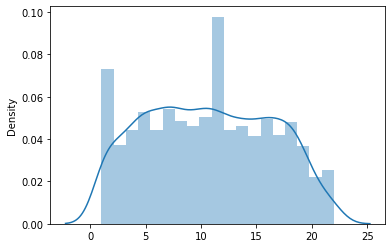

In [365]:
#tenure
sns.distplot(x=df_demography['tenure']) #kind of normal

In [366]:
df_demography['tenure'].fillna(df_demography['tenure'].mean(),inplace=True)

In [367]:
df_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   bool          
 10  owns_car    

**Customer Addresses**


In [368]:
#reading data
df_addresses = pd.read_excel(xls, sheet_name=4,header=1)

In [369]:
df_addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [370]:
#no nulls
df_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [371]:
df_addresses.duplicated().sum()

0

In [372]:
#unique
df_addresses.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [373]:
#replacing other values
df_addresses['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [374]:
df_addresses['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

Everything else looks fine!

**New Customer List**

In [375]:
#reading data
df_ncustomers = pd.read_excel(xls, sheet_name=2,header=1)

In [376]:
df_ncustomers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.63,0.7875,0.984375,0.836719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.56,0.5600,0.700000,0.595000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.94,0.9400,0.940000,0.940000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.63,0.7875,0.787500,0.787500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4,4,1.703125


In [377]:
#info
df_ncustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [378]:
#null values
df_ncustomers.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [379]:
#duplicates
df_ncustomers.duplicated().sum()

0

In [380]:
#gender
df_ncustomers['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [381]:
df_ncustomers['gender'].replace({'U':'Unspecified'},inplace=True)

In [382]:
#dob
df_ncustomers['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [383]:
df_ncustomers['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

It's better to try and match missing data by concatenating all the dataframes, the rest remaining we will fill later on.

**Transactions**


In [384]:
#reading data
df_transactions = pd.read_excel(xls, sheet_name=1,header=1)

In [385]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [386]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [387]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [388]:
df_transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [389]:
df_transactions.duplicated().sum()

0

**MERGING**

In [390]:
df_ncustomers.insert(0, 'customer_id', range(4001, 4001 + len(df_ncustomers)))

In [391]:
df_ncustomers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.63,0.7875,0.984375,0.836719,1,1,1.718750
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.56,0.5600,0.700000,0.595000,1,1,1.718750
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.94,0.9400,0.940000,0.940000,1,1,1.718750
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.63,0.7875,0.787500,0.787500,4,4,1.703125
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4,4,1.703125


In [392]:
#merging customer demography and customer addresses
updated_df = pd.merge(df_demography, df_addresses, how='left', on='customer_id')

In [393]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   bool          
 10  owns_car    

In [394]:
final_df = pd.concat([updated_df, df_ncustomers], ignore_index=True, sort=False)

In [412]:
final_df.isnull().sum()

customer_id                               0
first_name                                0
last_name                               154
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     104
job_title                               106
job_industry_category                   165
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
address                                   4
postcode                                  4
state                                     4
country                                   4
property_valuation                        4
Unnamed: 16                            4000
Unnamed: 17                            4000
Unnamed: 18                            4000
Unnamed: 19                            4000
Unnamed: 20                            4000
Rank                            

In [413]:
updated_df['last_name'] = updated_df.groupby('first_name').last_name.bfill().ffill()

In [414]:
updated_df['DOB'].fillna(lambda x: np.random.choice(updated_df['DOB']), inplace=True)

In [415]:
updated_df['job_title']= updated_df['job_title'].fillna(method='bfill')

In [416]:
updated_df['job_industry_category']= updated_df['job_industry_category'].fillna(method='ffill')

In [411]:
df_transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [398]:
df_transactions = df_transactions.sort_values(['customer_id', 'transaction_date'])

In [399]:
df_transactions['online_order'] = df_transactions['online_order'].fillna(method='bfill')

In [400]:
df_transactions['brand'] = df_transactions['brand'].fillna(method='ffill')

In [401]:
df_transactions['product_line'] = df_transactions['product_line'].fillna(method='bfill')

In [402]:
df_transactions['product_class'] = df_transactions['product_class'].fillna(method='bfill')

In [403]:
df_transactions['product_size'] = df_transactions['product_size'].fillna(method='ffill')

In [410]:
df_transactions['standard_cost'] = df_transactions['standard_cost'].fillna(df_transactions['standard_cost'].mean())

In [407]:
df_transactions['product_first_sold_date'] = df_transactions['product_first_sold_date'].fillna(df_transactions['product_first_sold_date'].mean())